In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
formacao = ['Econo', 'Estat', 'Eng', 'Mat', 'Ciên. da Comp.', 'Econo', 'Estat', 'Eng', 'Mat', 'Ciên. da Comp.', 'Econo', 'Estat', 'Eng', 'Mat', 'Ciên. da Comp.', 'Econo', 'Estat', 'Eng', 'Mat', 'Ciên. da Comp.', 'Adm', 'Dir', 'Estat', 'Ciên. da Comp.']
linguagem = ['Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'R', 'R', 'Julia']
superior = ['Graduação', 'Graduação', 'Graduação', 'Graduação', 'Graduação', 'Graduação', 'Mestrado', 'Mestrado', 'Doutorado']
notas = np.arange(0, 10.25, 0.25)
salarios = np.concatenate((np.arange(3000, 11000, 1000), np.array([3000]*2 + [4000]*6 + [5000]*10 + [6000]*6 + [7000]*4 + [8000]*2 + [9000]*4 + [11000]), np.array([1000, 15000])))

In [13]:
salarios

array([ 3000,  4000,  5000,  6000,  7000,  8000,  9000, 10000,  3000,
        3000,  4000,  4000,  4000,  4000,  4000,  4000,  5000,  5000,
        5000,  5000,  5000,  5000,  5000,  5000,  5000,  5000,  6000,
        6000,  6000,  6000,  6000,  6000,  7000,  7000,  7000,  7000,
        8000,  8000,  9000,  9000,  9000,  9000, 11000,  1000, 15000])

In [14]:
pesos_ascen = np.concatenate((np.arange(1, 11, 1), np.arange(20, 60, 4), np.arange(70, 170, 10), np.arange(200, 400, 20), np.array([200])))
pesos_centr = np.concatenate((np.arange(1, 11, 1), np.arange(70, 170, 10), np.array([200]), np.arange(200, 400, 20), np.arange(20, 60, 4)))
pesos_descen = np.concatenate((np.array([100]), np.arange(200, 400, 20), np.arange(200, 400, 20), np.arange(20, 60, 4), np.arange(1, 11, 1)))
pesos_outliers = np.concatenate((np.array([100]), np.arange(1, 10, 1), np.arange(200, 400, 20), np.arange(20, 60, 4), np.arange(1, 11, 1), np.array([80])))

In [21]:
prob_ascen = np.random.dirichlet(pesos_ascen, size=1)[0]
prob_centr = np.random.dirichlet(pesos_centr, size=1)[0]
prob_descen = np.random.dirichlet(pesos_descen, size=1)[0]
prob_outliers = np.random.dirichlet(pesos_outliers, size=1)[0]
prob_descen

array([0.01602068, 0.03343128, 0.03248611, 0.03673289, 0.04255734,
       0.0499606 , 0.05008451, 0.04952056, 0.05058292, 0.05891799,
       0.05661356, 0.02483825, 0.03434788, 0.03822184, 0.04446911,
       0.04851021, 0.04567238, 0.05212322, 0.0509894 , 0.05351399,
       0.05959523, 0.00370271, 0.00323039, 0.00380538, 0.00518843,
       0.00556411, 0.00675772, 0.00883179, 0.00818138, 0.00942415,
       0.00773243, 0.00030227, 0.00017357, 0.00055966, 0.00091562,
       0.00066471, 0.0005389 , 0.00079193, 0.00152764, 0.00104526,
       0.00187202])

In [22]:
base = {'ID do Candidato': [], 'Nota Mat/Est': [], 'Nota Program': [], 'Nota Port': [], 'Nota Neg': [], 'Graduacao': [], 'Nível Superior': [], 'Principal Linguagem': [], 'Pretensao Salarial': []}
for i in range(200):
    base['ID do Candidato'].append(i + 1)
    base['Nota Mat/Est'].append(np.random.choice(notas, p=prob_ascen))
    base['Nota Program'].append(np.random.choice(notas, p=prob_ascen))
    base['Nota Port'].append(np.random.choice(notas, p=prob_centr))
    base['Nota Neg'].append(np.random.choice(notas, p=prob_descen))
    base['Graduacao'].append(np.random.choice(formacao))
    base['Nível Superior'].append(np.random.choice(superior))
    base['Principal Linguagem'].append(np.random.choice(linguagem))
    base['Pretensao Salarial'].append(np.random.choice(salarios))

In [23]:
data = pd.DataFrame(base)

In [24]:
data['Media Final'] = data[['Nota Mat/Est', 'Nota Port', 'Nota Program', 'Nota Neg']].mean(axis=1)

In [25]:
data

,ID do Candidato,Nota Mat/Est,Nota Program,Nota Port,Nota Neg,Graduacao,Nível Superior,Principal Linguagem,Pretensao Salarial,Media Final
0,1,9.75,9.50,6.25,0.75,Mat,Graduação,Python,4000,6.5625
1,2,6.75,9.00,4.25,6.75,Ciên. da Comp.,Graduação,Julia,5000,6.6875
2,3,9.50,9.50,6.75,4.25,Estat,Graduação,Python,9000,7.5000
3,4,7.50,9.50,6.00,2.00,Estat,Doutorado,Python,4000,6.2500
4,5,9.00,6.25,3.25,4.50,Eng,Doutorado,Python,9000,5.7500
...,...,...,...,...,...,...,...,...,...,...
195,196,9.00,7.25,6.25,2.00,Dir,Doutorado,Python,5000,6.1250
196,197,7.00,8.25,6.75,4.75,Econo,Graduação,Python,5000,6.6875
197,198,6.00,8.25,4.75,2.00,Econo,Graduação,R,6000,5.2500
198,199,3.00,8.25,4.50,5.00,Ciên. da Comp.,Graduação,R,4000,5.1875


In [27]:
data["Nível Superior"].value_counts(1)

Graduação    0.63
Mestrado     0.20
Doutorado    0.17
Name: Nível Superior, dtype: float64

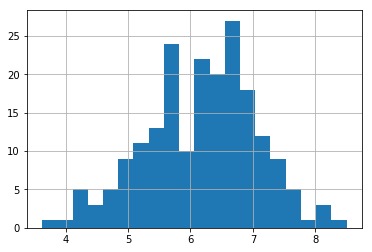

In [283]:
data['Media Final'].hist(bins=20)

In [284]:
data['Nota Neg'].value_counts().sort_index()

0.00      2
0.25      5
0.50      4
0.75      7
1.00      7
1.25      6
1.50     12
1.75     14
2.00     13
2.25      9
2.50     14
2.75      4
3.00      3
3.25     12
3.50      7
3.75      9
4.00      8
4.25     13
4.50     14
4.75      9
5.00     11
5.50      1
6.00      2
6.25      2
6.50      1
6.75      2
7.00      2
7.25      1
7.50      1
8.00      1
8.50      1
8.75      1
9.50      1
10.00     1
Name: Nota Neg, dtype: int64

In [285]:
data.head()

,ID do Candidato,Nota Mat/Est,Nota Program,Nota Port,Nota Neg,Formacao,Principal Linguagem,Pretensao Salarial,Media Final
0,1,6.00,8.25,6.75,1.75,Mat,Julia,6000,5.6875
1,2,7.75,5.50,4.75,1.75,Mat,Python,9000,4.9375
2,3,2.50,8.00,7.00,3.75,Estat,Python,5000,5.3125
3,4,7.25,6.00,7.50,2.75,Ciên. da Comp.,Julia,4000,5.8750
4,5,7.50,9.50,7.25,4.00,Eng,Julia,4000,7.0625


In [286]:
data.describe()

,ID do Candidato,Nota Mat/Est,Nota Program,Nota Port,Nota Neg,Pretensao Salarial,Media Final
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,100.500000,7.772500,7.711250,6.053750,3.17750,6205.000000,6.178750
std,57.879185,1.718067,1.984091,1.556692,1.87763,2417.061424,0.895117
min,1.000000,1.750000,1.750000,2.750000,0.00000,1000.000000,3.625000
25%,50.750000,6.750000,6.500000,5.000000,1.75000,5000.000000,5.625000
50%,100.500000,8.250000,8.250000,6.250000,3.12500,5500.000000,6.250000
75%,150.250000,9.000000,9.250000,7.250000,4.50000,8000.000000,6.750000
max,200.000000,10.000000,10.000000,10.000000,10.00000,15000.000000,8.500000


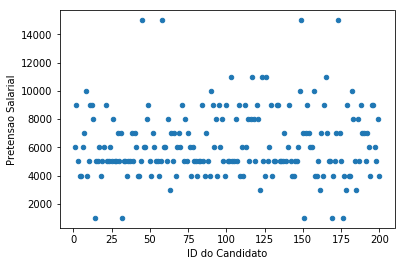

In [287]:
data[['ID do Candidato', 'Pretensao Salarial']].plot.scatter(0, 1)

In [288]:
data['Pretensao Salarial (mil)'] = (data['Pretensao Salarial']/1000).apply(int)

In [289]:
data.drop('Pretensao Salarial', axis=1, inplace=True)

In [290]:
data = data.reindex(columns=['ID do Candidato', 'Nota Mat/Est', 'Nota Program', 'Nota Port', 'Nota Neg', 'Media Final', 'Formacao', 'Principal Linguagem', 'Pretensao Salarial (mil)'])

In [291]:
data.head()

,ID do Candidato,Nota Mat/Est,Nota Program,Nota Port,Nota Neg,Media Final,Formacao,Principal Linguagem,Pretensao Salarial (mil)
0,1,6.00,8.25,6.75,1.75,5.6875,Mat,Julia,6
1,2,7.75,5.50,4.75,1.75,4.9375,Mat,Python,9
2,3,2.50,8.00,7.00,3.75,5.3125,Estat,Python,5
3,4,7.25,6.00,7.50,2.75,5.8750,Ciên. da Comp.,Julia,4
4,5,7.50,9.50,7.25,4.00,7.0625,Eng,Julia,4


In [292]:
data.to_csv('dataset.csv', index=False, sep=';')

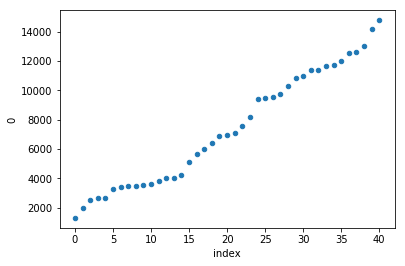

In [547]:
x = np.sort(np.random.uniform(1000, 15000, size=41))
pd.DataFrame(x).reset_index().plot.scatter(x='index', y=0)

In [162]:
y = {'Sal': []}
for i in range(300):
    y['Sal'].append(np.random.choice(x, p=prob_outliers))

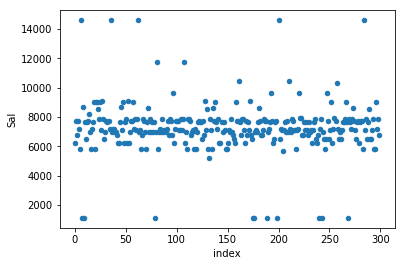

In [490]:
pd.DataFrame(y).reset_index().plot.scatter(0, 1)

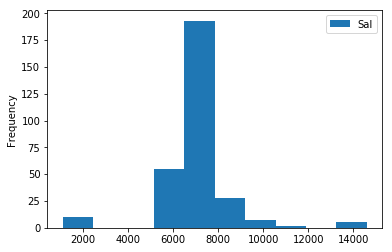

In [168]:
pd.DataFrame(y).plot.hist(bins=10)

In [268]:
data = pd.read_excel('atlas2013_dadosbrutos_pt.xlsx', sheet_name='MUN 91-00-10')

In [304]:
datau = pd.read_excel('atlas2013_dadosbrutos_pt.xlsx', sheet_name='UF 91-00-10')

In [379]:
list(data.columns)

Index(['ANO', 'UF', 'Codmun6', 'Codmun7', 'Município', 'ESPVIDA', 'FECTOT',
       'MORT1', 'MORT5', 'RAZDEP',
       ...
       'PIA1517', 'PIA18M', 'POP', 'POPT', 'I_ESCOLARIDADE', 'I_FREQ_PROP',
       'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R'],
      dtype='object', length=237)

In [310]:
estados = datau.loc[datau.ANO == 2010][['UF', 'UFN']]
estados.loc[estados.UF == 11].UFN

54    Rondônia
Name: UFN, dtype: object

In [380]:
data2 = data.loc[data.ANO == 2010][['UF', 'Município', 'ESPVIDA', 'FECTOT', 'E_ANOSESTUDO', 'GINI', 'RDPC', 'POPT', 'IDHM']]

In [381]:
states = []
for row in data2.iterrows():
#     print(row[1]['UF'])
    states.append(estados.loc[estados.UF == row[1]['UF']].UFN.values[0])

In [382]:
data2['UFN'] = states

In [384]:
norte = ['Amazonas', 'Roraima', 'Amapá', 'Pará', 'Tocantins', 'Rondônia', 'Acre']
nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Pernambuco', 'Paraíba', 'Sergipe', 'Alagoas', 'Bahia']
centro_oeste = ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal']
sudeste = ['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais']
sul = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']

In [385]:
regioes = []
for row in data2.iterrows():
    if row[1]['UFN'] in norte:
        regioes.append('Norte')
    elif row[1]['UFN'] in nordeste:
        regioes.append('Nordeste')
    elif row[1]['UFN'] in centro_oeste:
        regioes.append('Centro-Oeste')
    elif row[1]['UFN'] in sudeste:
        regioes.append('Sudeste')
    elif row[1]['UFN'] in sul:
        regioes.append('Sul')
    else:
        regioes.append(row[0])

In [386]:
data2['REGIAO'] = regioes

In [387]:
data2 = data2.drop('UF', axis=1)

In [426]:
(data2.IDHM * data2.RDPC).sum()/data2.RDPC.sum()

0.6913699695271998

In [427]:
data2.IDHM.mean()

0.6591574123989226

In [401]:
data2['E_ANOSESTUDO'].mean()

9.463638814016203

In [403]:
(data2['E_ANOSESTUDO'] * data2['RDPC']).sum()/data2['RDPC'].sum()

9.740944126976817

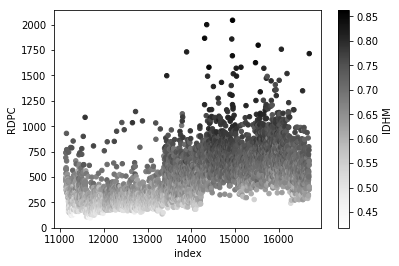

In [300]:
data2.reset_index().plot.scatter('index', 'RDPC', c='IDHM')

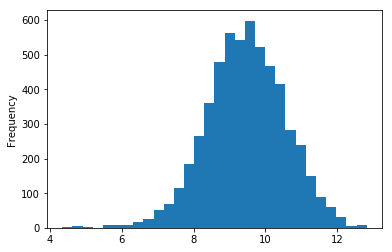

In [447]:
data2['E_ANOSESTUDO'].plot.hist(bins=30)